In [58]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
data = pd.read_csv("Admission_predict.csv")
# data.head()
print(data)

     Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit 
0             1        337          118  ...  9.65         1              0.92
1             2        324          107  ...  8.87         1              0.76
2             3        316          104  ...  8.00         1              0.72
3             4        322          110  ...  8.67         1              0.80
4             5        314          103  ...  8.21         0              0.65
5             6        330          115  ...  9.34         1              0.90
6             7        321          109  ...  8.20         1              0.75
7             8        308          101  ...  7.90         0              0.68
8             9        302          102  ...  8.00         0              0.50
9            10        323          108  ...  8.60         0              0.45
10           11        325          106  ...  8.40         1              0.52
11           12        327          111  ...  9.00  

In [52]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [53]:
data.describe()

Serial No.   GRE Score  ...    Research  Chance of Admit 
count  400.000000  400.000000  ...  400.000000        400.000000
mean   200.500000  316.807500  ...    0.547500          0.724350
std    115.614301   11.473646  ...    0.498362          0.142609
min      1.000000  290.000000  ...    0.000000          0.340000
25%    100.750000  308.000000  ...    0.000000          0.640000
50%    200.500000  317.000000  ...    1.000000          0.730000
75%    300.250000  325.000000  ...    1.000000          0.830000
max    400.000000  340.000000  ...    1.000000          0.970000

[8 rows x 9 columns]

In [54]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [55]:
# data['University Rating'].groupby('University Rating')
b = data['University Rating'].value_counts()
print(b)


3    133
2    107
4     74
5     60
1     26
Name: University Rating, dtype: int64


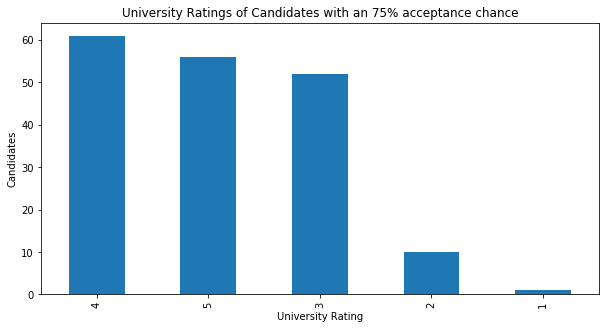

In [61]:
data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})
s = data[data["Chance of Admit"] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with an 75% acceptance chance")
s.plot(kind='bar',figsize=(10, 5))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

In [62]:
print("Average GRE Score :{0:.2f} out of 340".format(data['GRE Score'].mean()))
print('Average TOEFL Score:{0:.2f} out of 120'.format(data['TOEFL Score'].mean()))
print('Average CGPA:{0:.2f} out of 10'.format(data['CGPA'].mean()))
print('Average Chance of getting admitted:{0:.2f}%'.format(data['Chance of Admit'].mean()*100))

Average GRE Score :316.81 out of 340
Average TOEFL Score:107.41 out of 120
Average CGPA:8.60 out of 10
Average Chance of getting admitted:72.43%


In [63]:
data.mean()

Serial No.           200.500000
GRE Score            316.807500
TOEFL Score          107.410000
University Rating      3.087500
SOP                    3.400000
LOR                    3.452500
CGPA                   8.598925
Research               0.547500
Chance of Admit        0.724350
dtype: float64

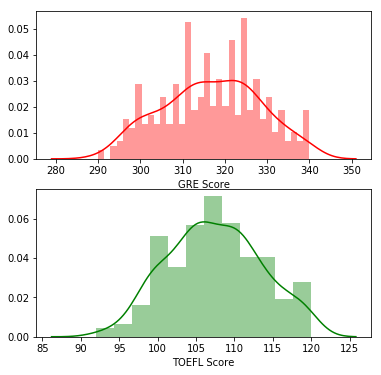

In [75]:
plt.figure(figsize=(6,6))
plt.subplot(2, 1, 1)
sns.distplot(data['GRE Score'],bins=34,color='Red')
# sns.distplot(data['GRE Score'],bins=50)
# sns.distplot(data['GRE Score'],color = 'green')
plt.subplot(2, 1, 2)
sns.distplot(data['TOEFL Score'],bins=12,color='Green')

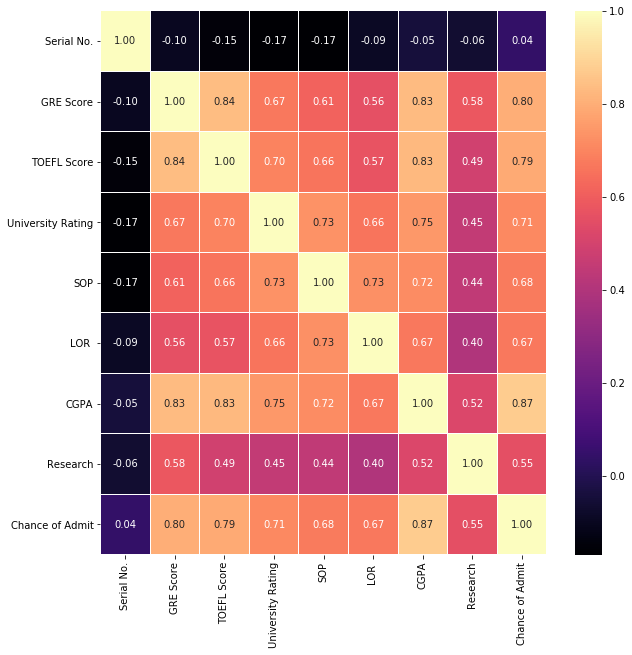

In [76]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

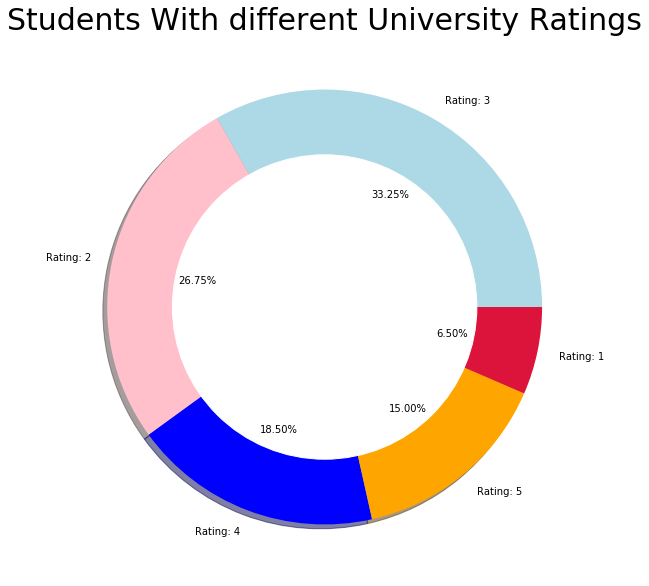

In [77]:
# making a donut chart for the analysis of students with different university ratings

size = data['University Rating'].value_counts()
labels = "Rating: 3", "Rating: 2", "Rating: 4", "Rating: 5", "Rating: 1"
colors = ['lightblue', 'pink', 'blue', 'orange', 'crimson']

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Students With different University Ratings', fontsize = 30)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.axis('off')
plt.show()

In [93]:
data.sort_values(by =['Chance of Admit', 'University Rating','GRE Score','TOEFL Score'],ascending=False)

Serial No.  GRE Score  TOEFL Score  ...  CGPA  Research  Chance of Admit
202         203        340          120  ...  9.91         1             0.97
24           25        336          119  ...  9.80         1             0.97
203         204        334          120  ...  9.87         1             0.97
143         144        340          120  ...  9.92         1             0.97
130         131        339          114  ...  9.76         1             0.96
71           72        336          112  ...  9.76         1             0.96
385         386        335          117  ...  9.82         1             0.96
213         214        333          119  ...  9.78         1             0.96
81           82        340          120  ...  9.50         1             0.96
384         385        340          113  ...  9.74         1             0.96
148         149        339          116  ...  9.80         1             0.96
23           24        334          119  ...  9.70         1             0.95
212         213        338          120  ...  9.66         1             0.95
372         373        336          119  ...  9.62         1             0.95
399         400        333          117  ...  9.66         1             0.95
25           26        340          120  ...  9.60         1             0.94
84           85        340          115  ...  9.45         1             0.94
193         194        336          118  ...  9.53         1             0.94
120         121        335          117  ...  9.56         1             0.94
121         122        334          119  ...  9.48         1             0.94
70           71        332          118  ...  9.64         1             0.94
337         338        332          118  ...  9.47         1             0.94
151         152        332          116  ...  9.28         1             0.94
34           35        331          112  ...  9.80         1             0.94
22           23        328          116  ...  9.50         1             0.94
284         285        340          112  ...  9.66         1             0.94
214         215        331          117  ...  9.42         1             0.94
187         188        335          118  ...  9.44         1             0.93
108         109        331          116  ...  9.38         1             0.93
285         286        331          116  ...  9.26         1             0.93
..          ...        ...          ...  ...   ...       ...              ...
272         273        294           95  ...  7.64         0             0.49
60           61        309          100  ...  8.10         0             0.48
39           40        307          108  ...  7.70         0             0.48
96           97        306          100  ...  8.00         0             0.48
61           62        307          101  ...  8.20         0             0.47
346         347        304           97  ...  7.64         0             0.47
118         119        296           99  ...  7.28         0             0.47
344         345        295           96  ...  7.34         0             0.47
377         378        290          100  ...  7.56         0             0.47
40           41        308          110  ...  8.00         1             0.46
386         387        302          101  ...  7.96         0             0.46
57           58        298           99  ...  7.60         0             0.46
28           29        295           93  ...  7.20         0             0.46
79           80        294           93  ...  7.36         0             0.46
117         118        290          104  ...  7.46         0             0.45
9            10        323          108  ...  8.60         0             0.45
93           94        301           97  ...  7.88         1             0.44
27           28        298           98  ...  7.50         1             0.44
78           79        296           95  ...  7.54         1             0.44
329         330        297 

In [96]:
data.duplicated(subset=None, keep='first').sum()

0

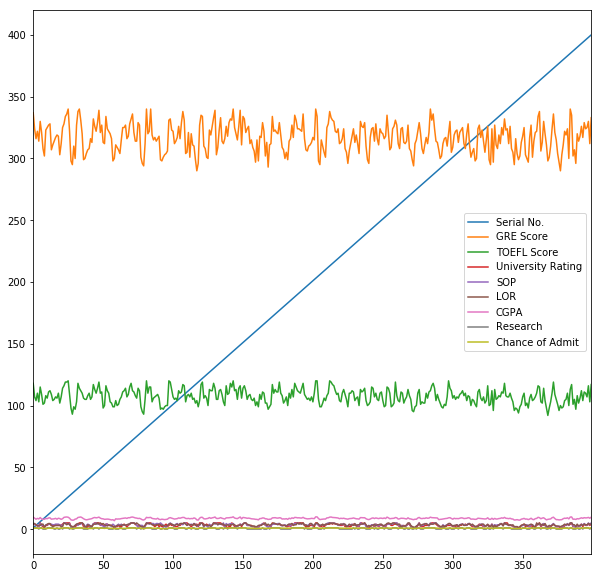

In [97]:
data.plot()
plt.show()